In [2]:
import tensorflow as tf
from tensorflow import keras

tf.__version__

'2.3.0'

In [3]:
keras.__version__

'2.4.0'

In [4]:
fashion_mnist = keras.datasets.fashion_mnist
(X_train_full, y_train_full), (X_test,y_test) = fashion_mnist.load_data()

4423680/4422102 [==============================] - 1s 0us/step


In [5]:
X_train_full.shape

(60000, 28, 28)

In [6]:
X_valid, X_train = X_train_full[:5000] / 255.0, X_train_full[5000:] / 255.0

y_valid, y_train = y_train_full[:5000], y_train_full[5000:]



In [7]:
y_valid[0]

9

In [8]:
class_names = [
    "T-shirt/top", "Trouser", "Pullover", "Dress", "Coat",
    "Sandal","Shirt","Sneaker","Bag","Ankle boot"
]

In [9]:
class_names[y_valid[0]]

'Ankle boot'

In [10]:
model = keras.models.Sequential()
model.add(keras.layers.Flatten(input_shape=[28,28]))
model.add(keras.layers.Dense(300,activation="relu"))
model.add(keras.layers.Dense(100,activation="relu"))
model.add(keras.layers.Dense(10, activation="softmax"))

In [11]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 784)               0         
_________________________________________________________________
dense (Dense)                (None, 300)               235500    
_________________________________________________________________
dense_1 (Dense)              (None, 100)               30100     
_________________________________________________________________
dense_2 (Dense)              (None, 10)                1010      
Total params: 266,610
Trainable params: 266,610
Non-trainable params: 0
_________________________________________________________________


In [12]:
model.compile(loss="sparse_categorical_crossentropy",optimizer="sgd",metrics=["accuracy"])

In [13]:
history = model.fit(X_train, y_train, epochs=30, validation_data=(X_valid, y_valid))

Epoch 1/30
1719/1719 [==============================] - 2s 1ms/step - loss: 0.7214 - accuracy: 0.7651 - val_loss: 0.4966 - val_accuracy: 0.8366
Epoch 2/30
1719/1719 [==============================] - 2s 1ms/step - loss: 0.4837 - accuracy: 0.8306 - val_loss: 0.4317 - val_accuracy: 0.8576
Epoch 3/30
1719/1719 [==============================] - 2s 1ms/step - loss: 0.4389 - accuracy: 0.8466 - val_loss: 0.4093 - val_accuracy: 0.8604
Epoch 4/30
1719/1719 [==============================] - 2s 1ms/step - loss: 0.4142 - accuracy: 0.8542 - val_loss: 0.4049 - val_accuracy: 0.8588
Epoch 5/30
1719/1719 [==============================] - 2s 1ms/step - loss: 0.3926 - accuracy: 0.8620 - val_loss: 0.4011 - val_accuracy: 0.8598
Epoch 6/30
1719/1719 [==============================] - 2s 1ms/step - loss: 0.3780 - accuracy: 0.8663 - val_loss: 0.3861 - val_accuracy: 0.8652
Epoch 7/30
1719/1719 [==============================] - 2s 1ms/step - loss: 0.3639 - accuracy: 0.8720 - val_loss: 0.3714 - val_accuracy:

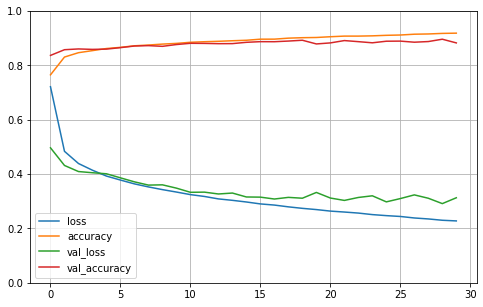

In [14]:
import pandas as pd

import matplotlib.pyplot as plt

pd.DataFrame(history.history).plot(figsize=(8,5))
plt.grid(True)
plt.gca().set_ylim(0,1)
plt.show()

In [15]:
X_new = X_test[:3]
y_proba = model.predict(X_new)
y_proba.round(2)

array([[0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.]], dtype=float32)

In [16]:
y_pred = model.predict_classes(X_new)
y_pred

import numpy as np

np.array(class_names)[y_pred]

Instructions for updating:
Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).


array(['Ankle boot', 'Pullover', 'Trouser'], dtype='<U11')

In [17]:
y_test[:3]

array([9, 2, 1], dtype=uint8)

(-0.5, 27.5, 27.5, -0.5)

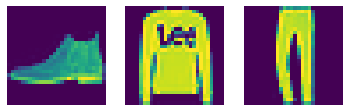

In [27]:



plt.subplot(1,3,1)

plt.imshow(X_test[0],interpolation="nearest")

plt.axis("off")

plt.subplot(1,3,2)

plt.imshow(X_test[1],interpolation="nearest")

plt.axis("off")


plt.subplot(1,3,3)

plt.imshow(X_test[2],interpolation="nearest")

plt.axis("off")